# Minimal example for paracetamol simulation

In [12]:
import os
import roadrunner
from roadrunner import SelectionRecord
import pandas as pd
from matplotlib import pyplot as plt

data_dir = "./data/"
model_path = "./model/limax_pkpd_37.xml"

kwargs_data = {'marker': 's', 'linestyle': '--', 'linewidth': 1, 'capsize': 3}
kwargs_sim = {'marker': None, 'linestyle': '-', 'linewidth': 2}

In [13]:
# load the model
r = roadrunner.RoadRunner(model_path)

# set selections
r.timeCourseSelections = ["time"] + r.model.getFloatingSpeciesIds() + r.model.getGlobalParameterIds()

# perform simulation
r.reset()
r.setValue('init(PODOSE_apap)', 5600)  # set dose in [mg]: 80 [mg/kg] * 70 [kg]
r.reset(SelectionRecord.GLOBAL_PARAMETER)
r.reset()

tend = 24   # [h]
steps = 300
s = r.simulate(start=0, end=24, steps=300)
s = pd.DataFrame(s, columns=s.colnames)

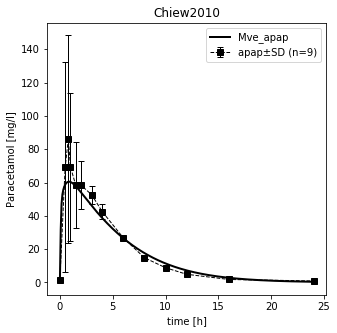

In [15]:
#--------------------
sid = 'Chiew2010' 
#--------------------
# data
Chiew2010_Fig = pd.read_csv(os.path.join(data_dir, "paracetamol", "Chiew2010_Fig.csv"), sep="\t")
data = Chiew2010_Fig[Chiew2010_Fig.substance == 'paracetamol']
        
# figure
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1.plot(s.time, s.Mve_apap, color="black", **kwargs_sim)
ax1.errorbar(data.time, data.apap, data.apap_sd,
             label="apap±SD (n=9)", color="black", **kwargs_data)
ax1.set_ylabel('Paracetamol [mg/l]')


for ax in (ax1, ):
    ax.set_title(sid)
    ax.set_xlabel('time [h]')
    ax.legend()
plt.show()